In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(15,10)})


In [3]:
dataset=pd.read_csv('outlier_handled')
dataset.drop('Unnamed: 0',axis=1,inplace=True)
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,year,month,day,Total_power_consumed
0,2008-03-30,21:12:00,3.112,0.000,236.63,13.2,2008,3,30,18.0
1,2010-04-29,09:29:00,2.210,0.246,239.55,9.2,2010,4,29,19.0
2,2009-07-31,00:05:00,0.666,0.078,242.29,2.8,2009,7,31,0.0
3,2010-02-06,09:08:00,1.292,0.058,238.26,5.4,2010,2,6,19.0
4,2007-01-25,21:13:00,1.964,0.076,242.06,8.2,2007,1,25,18.0


- dropping date and Time features because we spilitted the Date feature

In [4]:
dataset.drop(['Date','Time'],inplace=True,axis=1)

In [5]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,year,month,day,Total_power_consumed
0,3.112,0.000,236.63,13.2,2008,3,30,18.0
1,2.210,0.246,239.55,9.2,2010,4,29,19.0
2,0.666,0.078,242.29,2.8,2009,7,31,0.0
3,1.292,0.058,238.26,5.4,2010,2,6,19.0
4,1.964,0.076,242.06,8.2,2007,1,25,18.0


### Ordinal Encoding of year and month feature

In [6]:
dataset['year'].unique()

array([2008, 2010, 2009, 2007, 2006], dtype=int64)

In [24]:
sorted(dataset['month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [17]:
year_mapping={2006:0,2007:1,2008:2,2009:3,2010:4}

In [18]:
df1=dataset.copy()

In [19]:
df1['year']=df1['year'].replace(year_mapping)

In [37]:
df1.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,year,month,day,Total_power_consumed
0,3.112,0.000,236.63,13.2,2,3,30,18.0
1,2.210,0.246,239.55,9.2,4,4,29,19.0
2,0.666,0.078,242.29,2.8,3,7,31,0.0
3,1.292,0.058,238.26,5.4,4,2,6,19.0
4,1.964,0.076,242.06,8.2,1,1,25,18.0


### checking for the normal distribution

In [42]:
from scipy import stats

In [52]:
def qq_plot(col):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df1[col])
    plt.title(f'{col} pdf')
    plt.subplot(122)
    stats.probplot(df1[col],dist="norm", plot=plt)
    plt.title(f'{col} QQ plot')
    plt.show()

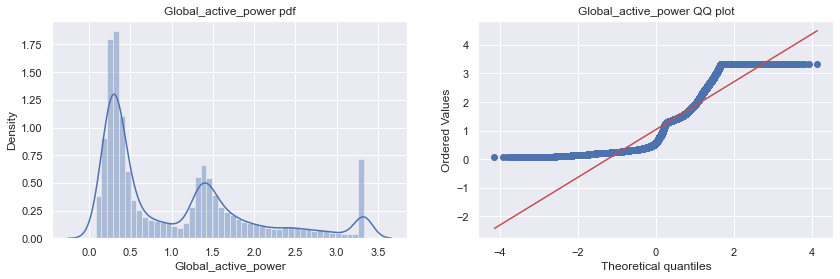

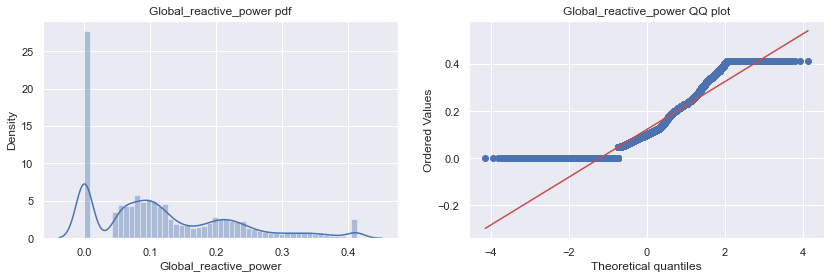

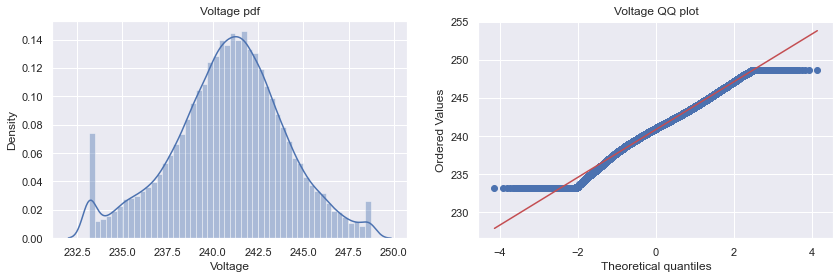

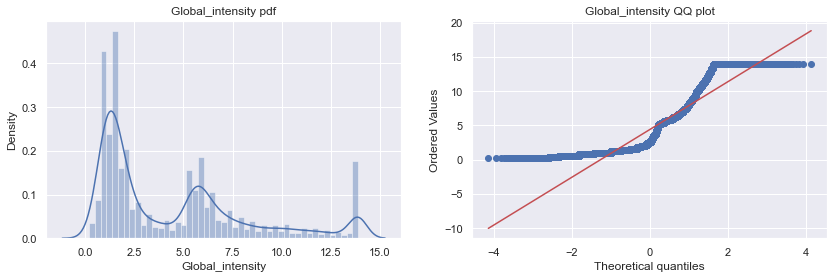

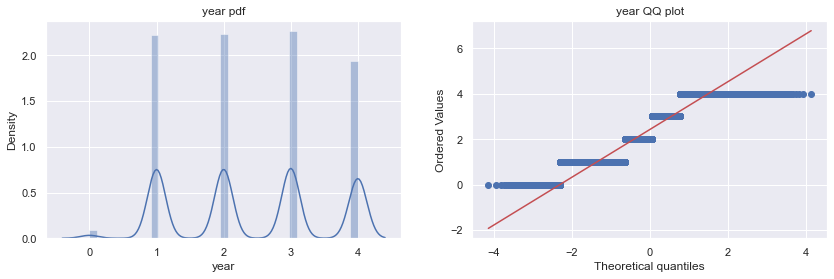

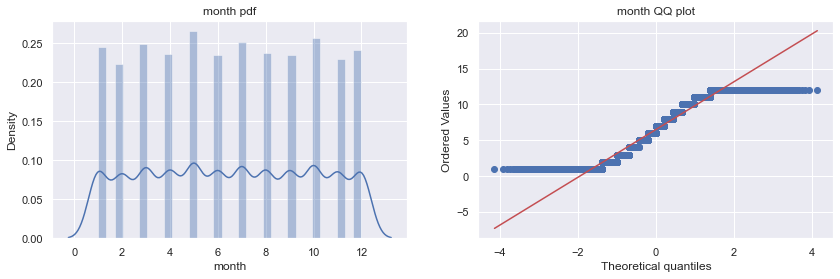

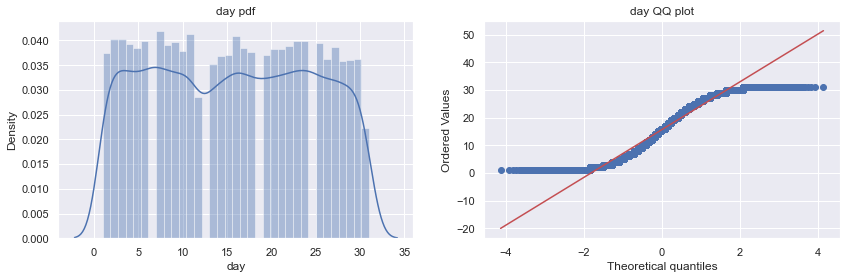

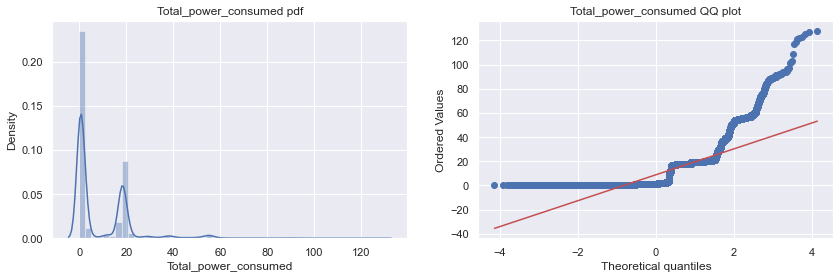

In [53]:
for feature in df1.columns:
    qq_plot(feature)

### Checking for normal distributions before and after transformations

In [56]:
df2=df1.copy()
def plots(df1,col,transformed):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(df1[col])
    plt.title('Before transformation')
    plt.subplot(122)
    sns.kdeplot(transformed)
    plt.title('After transformation')
    plt.show()
    

#### Applying log transformation

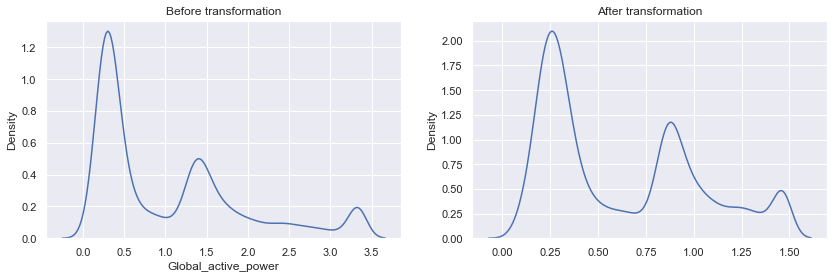

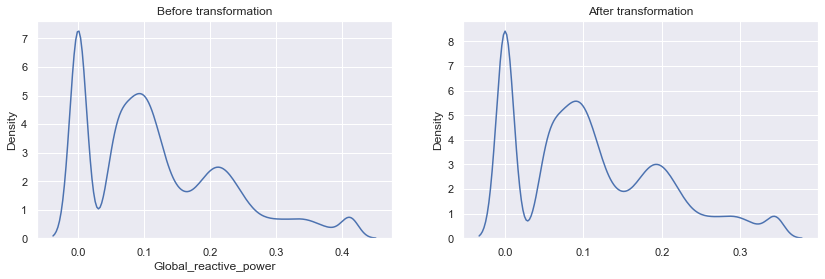

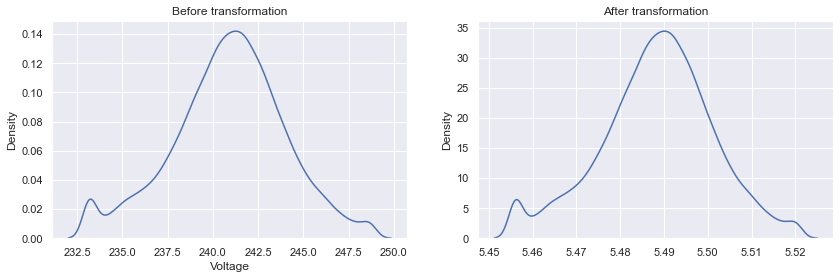

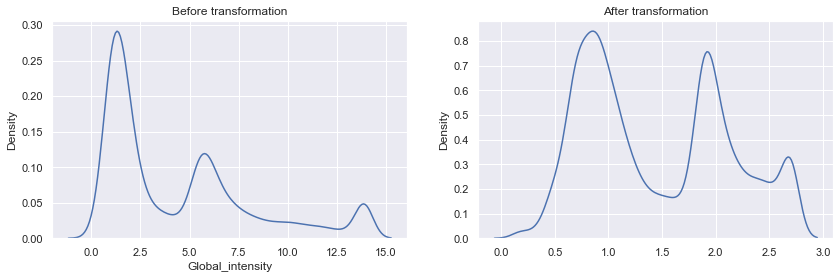

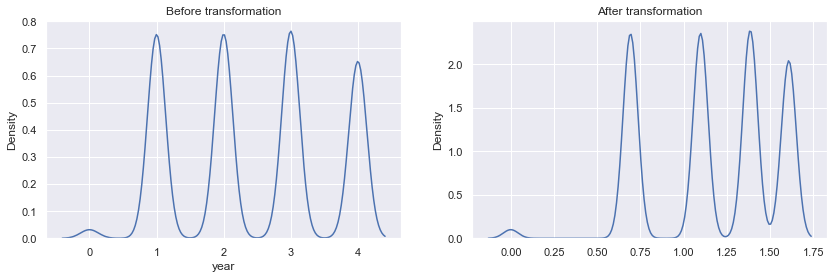

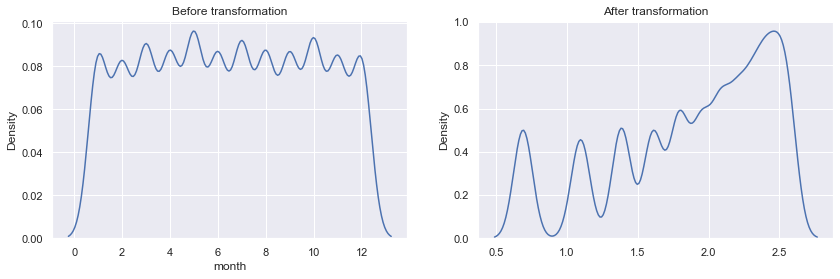

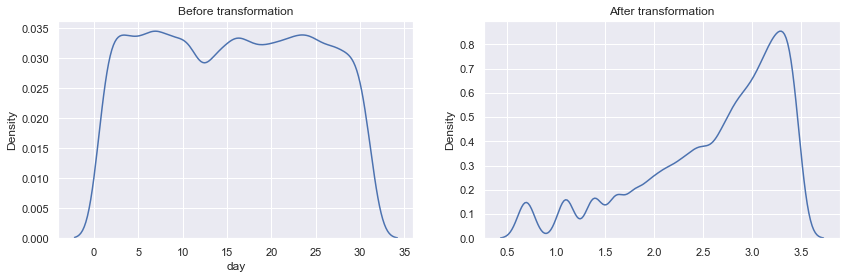

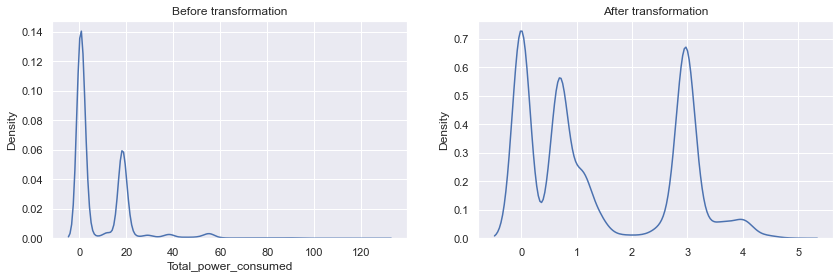

In [57]:
log_transformer = FunctionTransformer(np.log1p)
for col in df2.columns:
    X=np.array(df2[col])
    transformed = log_transformer.transform(X)
    plots(df1,col,transformed)

### Applying yeo johnson transfomer

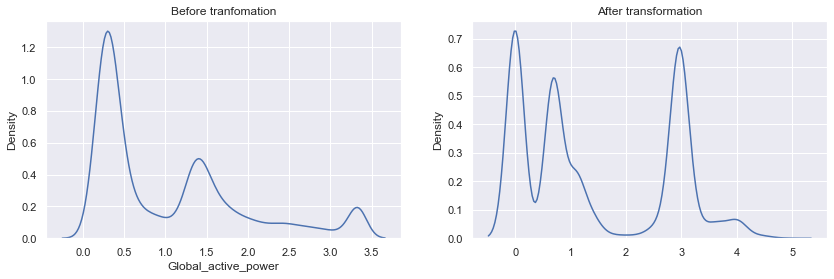

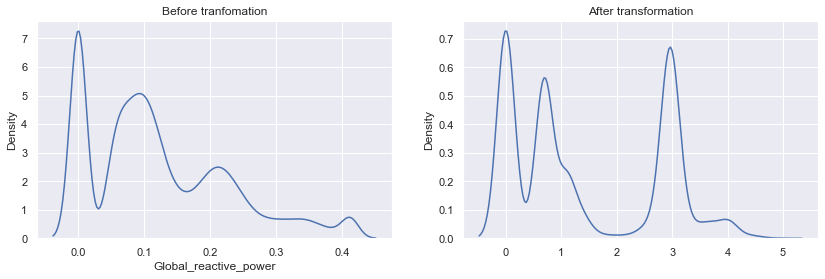

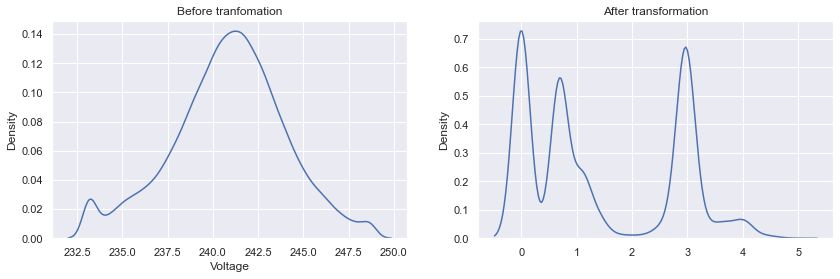

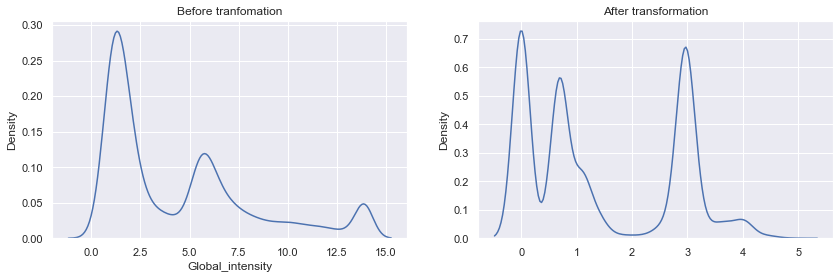

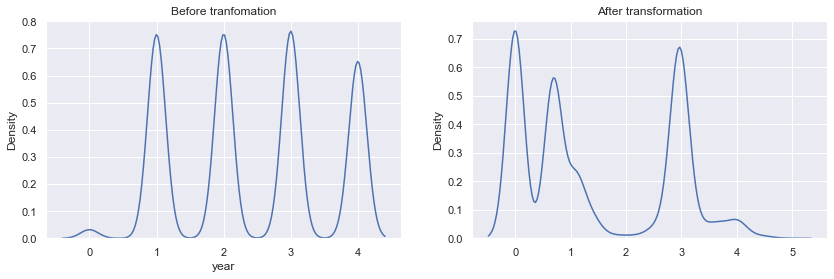

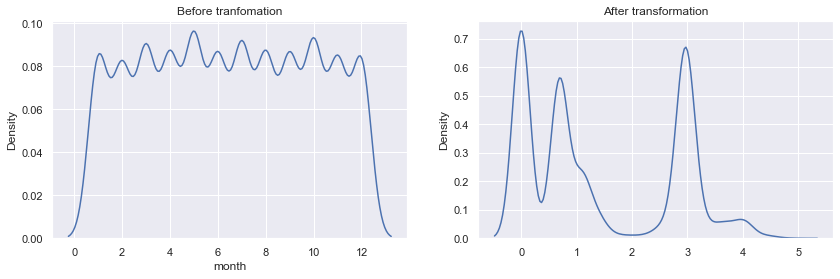

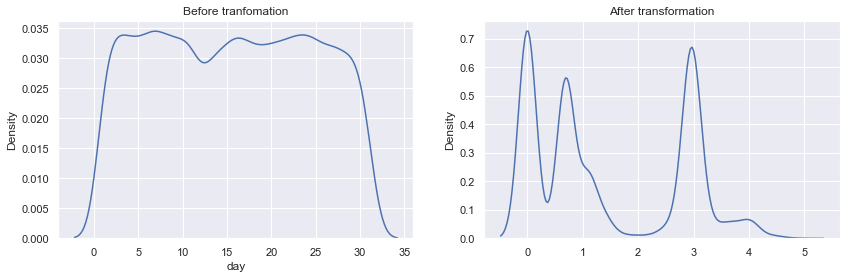

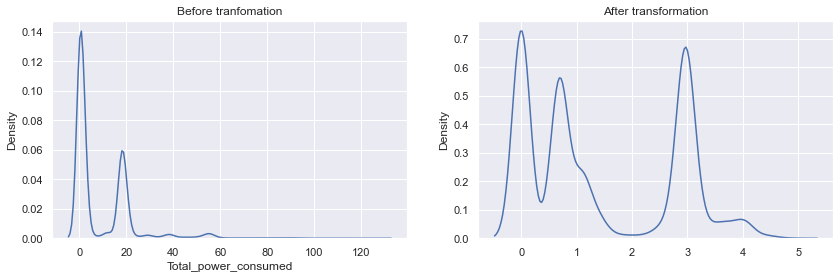

In [62]:
def power_plots(df1,col,t):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(df1[col])
    plt.title('Before tranfomation')
    plt.subplot(122)
    transfomed=t.fit_transform(df1[[col]]+0.0000001).flatten()
    sns.kdeplot(transformed)
    plt.title('After transformation')
    plt.show()
    
for feature in df1.columns:
    power_plots(df1,feature,PowerTransformer())

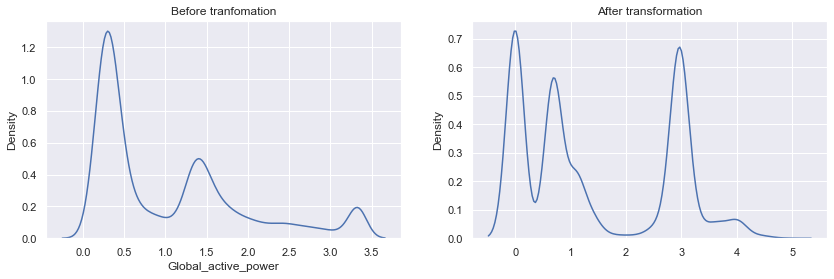

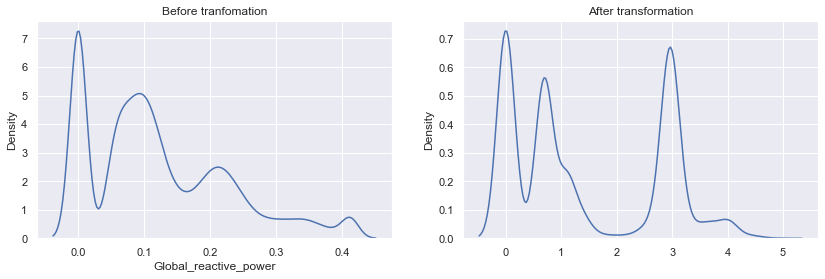

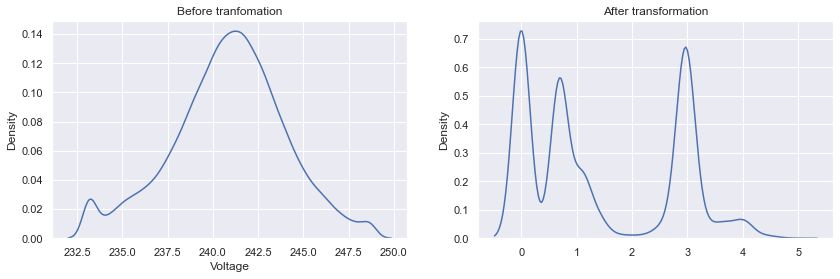

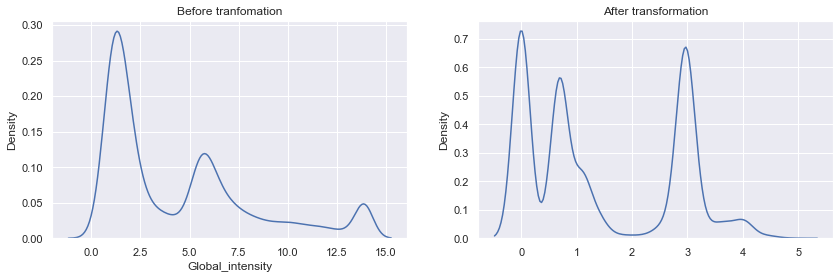

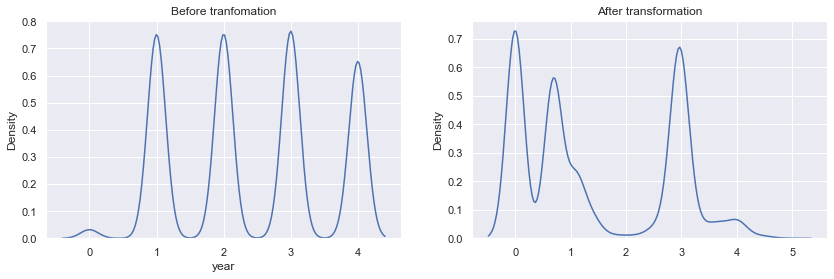

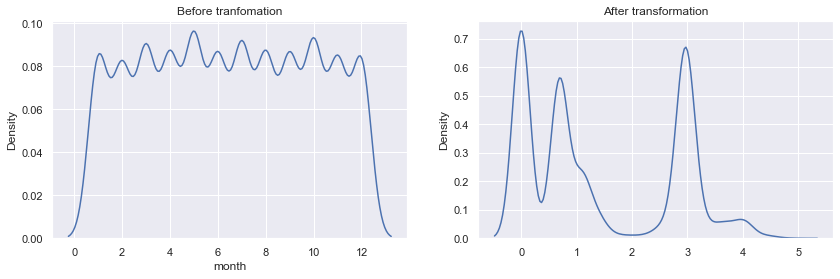

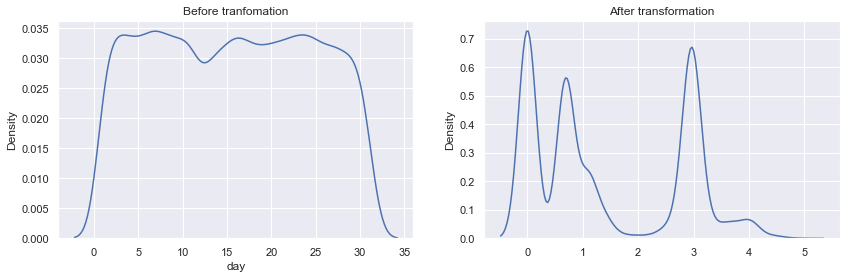

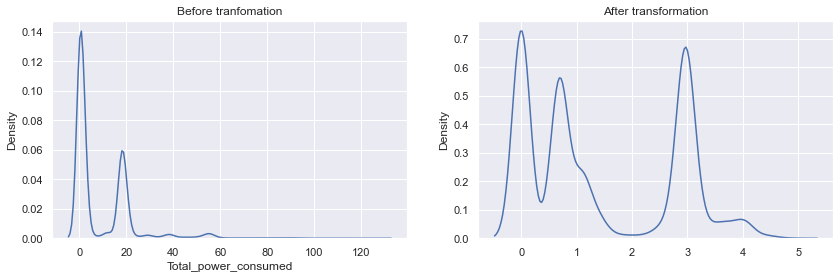

In [63]:
for feature in df1.columns:
    power_plots(df1,feature,PowerTransformer(method='box-cox'))

 - yeo jhonson and box- cox is not worked for voltage feature as it has changed the distribution of it
 - For other features log,yeo-jhonson and box-cox reduced the skewnewss from the observation log transformation is better